# Support Vector Machine

## Hinge Loss Function

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Load dataset and split data into training and test sets


In [2]:
clf_hinge = SGDClassifier(loss="hinge", max_iter=1000, random_state=42)
clf_hinge.fit(X_train, y_train)

y_test_pred = clf_hinge.predict(X_test)

Trian an SVM classifier with Hinge Loss and make predictions on the test set

In [3]:
print("Precision score:", precision_score(y_test, y_test_pred, average="weighted"))
print("Recall score:", recall_score(y_test, y_test_pred, average="weighted"))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Precision score: 0.88
Recall score: 0.8
Confusion Matrix:
[[19  0  0]
 [ 0 15  0]
 [ 0 10  6]]


- **Precision**: Measures how many predicted positives are truly positive
- **Recall**: Shows how many actual positives were correctly identified
- **Confusion Matrix**: Breaks down the types of correct and incorrect predictions, showing true positives, false positives, true negatives, and false negatives.

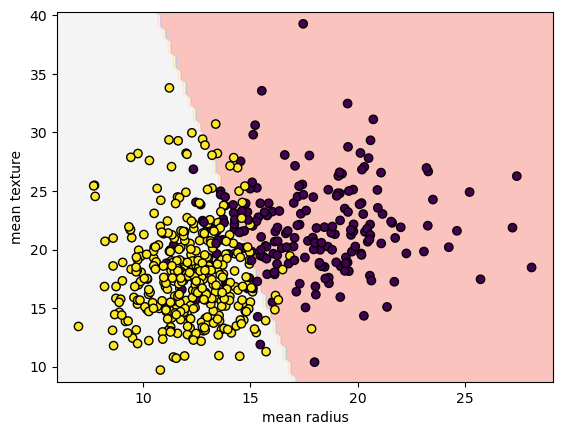

In [4]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target

svm = SVC(kernel='linear', C=1)
svm.fit(X, y)

DecisionBoundaryDisplay.from_estimator(
    svm,
    X,
    response_method="predict",
    alpha=0.8,
    cmap="Pastel1",
    xlabel=cancer.feature_names[0],
    ylabel=cancer.feature_names[1],
)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.savefig("figures/svm.png")
plt.show()

## Non-Linear SVM in Circular Decision Boundary

Accuracy: 1.00


/var/folders/ct/pqbzcwnd1_369hl_qttmjty00000gn/T/ipykernel_6800/2423371336.py:27: UserWarning: The following kwargs were not used by contour: 'cmpa'
  plt.contourf(xx, yy, Z, alpha=0.8, cmpa=plt.cm.Paired)


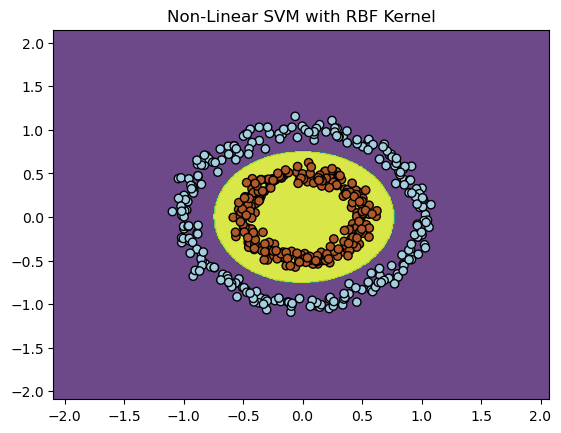

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X,y = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

svm = SVC(kernel='rbf', C=1, gamma=0.5)  # RBF kernel allows learning circular boundaries
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmpa=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title('Non-Linear SVM with RBF Kernel')

    plt.savefig('figures/non-linear_svm.png', dpi=300)
    plt.show()

plot_decision_boundary(X, y, svm)

## Non-Linear SVM for Radial Curve Pattern

Accuracy: 1.00


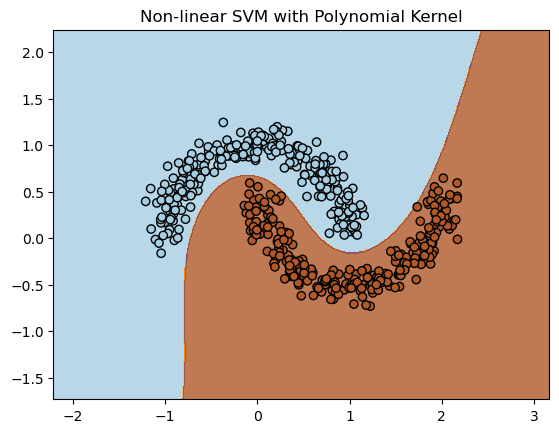

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=500, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_poly = SVC(kernel='poly', degree=3, C=1, coef0=1)  # degree and coef0 control the curve of the boundary
svm_poly.fit(X_train, y_train)

y_pred = svm_poly.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title('Non-linear SVM with Polynomial Kernel')

    plt.savefig("figures/svm_poly.png", dpi=300)
    plt.show()

plot_decision_boundary(X, y, svm_poly)